In [1]:
import os
import compress_pickle
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt

from pybkb.bkb import BKB
from pybkb.utils.cytoscape import render

In [2]:
def get_available_datasets(results_path):
    bkb_res = []
    bn_res = []
    # Get BKB results
    for dirname in os.listdir(os.path.join(results_path, 'bkb')):
        bkb_res.append(dirname)
    # Get BN results
    for dirname in os.listdir(os.path.join(results_path, 'bn')):
        bn_res.append(dirname)
    return bkb_res, bn_res

## Select BKB and BN results that you would like to analyze based on a keel dataset.
The results depicted in the paper are hosted on Zenodo [here](https://zenodo.org/record/6577348#.Yp3kr-xBxPY). Download this zip file to your local machine and unzip. Then specify it's location below.

In [3]:
# Specify the location where you have unzipped the results file 
RESULTS_PATH = 'path/to/results'

### Code below will build a jupyter dropdown widget for ease of use.
**Note:** If the dropdown does not display install the ipywidgets extension with:
``` bash
jupyter nbextension enable --py widgetsnbextension
```
and restart the jupyter notebook session. You can also view this [stack overflow article](https://stackoverflow.com/questions/36351109/ipython-notebook-ipywidgets-does-not-show) for further troubleshooting.

In [4]:
bkb_res_options, bn_res_options = get_available_datasets(RESULTS_PATH)

bkb = widgets.Dropdown(
    options=bkb_res_options,
    description='BKB Results Options:',
)

bn = widgets.Dropdown(
    options=bn_res_options,
    description='BN Results Options:',
)


display(bkb, bn)

Dropdown(description='BKB Results Options:', options=('australian-standard_classification-no_missing_values', …

Dropdown(description='BN Results Options:', options=('australian-standard_classification-no_missing_values', '…

## BKB Graph with Sources Hidden

In [5]:
bkb_path = os.path.join(RESULTS_PATH, 'bkb', bkb.get_interact_value(), 'learned.bkb')
learned_bkb = BKB.load(filepath=bkb_path)

In [6]:
render(learned_bkb, hide_sources=True)

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'nodeSpacing': 10, 'edgeLengthVal': 10}, cytoscape_style=[{…

## BKB Random Variable Relations

In [7]:
render(learned_bkb, hide_sources=True, rv_only=True)

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'nodeSpacing': 10, 'edgeLengthVal': 10}, cytoscape_style=[{…

## Associated BN Structure

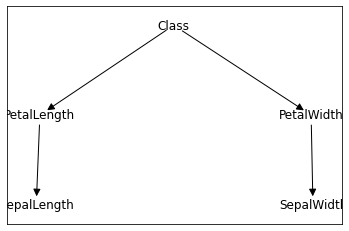

In [8]:
bn_path = os.path.join(RESULTS_PATH, 'bn', bkb.get_interact_value(), 'learned.bn')
with open(bn_path, 'rb') as f_:
    learned_bn = compress_pickle.load(f_, compression='lz4')
learned_bn.plot(abbrev=False)